In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [6]:
inspector = inspect(engine)

In [7]:
inspector.get_table_names()

['measurement', 'station']

In [8]:
# reflect an existing database into a new model
measurement_data = pd.read_sql("SELECT * FROM measurement", conn)
station_data = pd.read_sql("SELECT * FROM station", conn)
# reflect the tables
measurement_data.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [9]:
station_data.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [10]:
# View all of the classes that automap found
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
columns = inspector.get_columns("measurement")
for col in columns:
    print(col["name"], col["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [15]:
#print(type(measurement_data))
# measurement_data["date"] = pd.to_datetime(measurement_data["date"], "%Y-%m-%d")
# measurement_data["date"] = dt.datetime.strptime(measurement_data["date"], "%Y-%m-%d")

In [16]:
earliest_date = session.query(Measurement.date).first()
earliest_date

('2010-01-01')

In [17]:
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest_date

('2017-08-23')

In [18]:
type(latest_date)

sqlalchemy.util._collections.result

In [20]:
latest_date[0]

'2017-08-23'

In [21]:
latest_date_dt = dt.datetime.strptime(latest_date[0], "%Y-%m-%d")

In [22]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fa5a1356af0>,
 'tobs': 65.0,
 'prcp': 0.08,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'id': 1}

In [74]:
year_earlier = dt.date(latest_date_dt.year-1, latest_date_dt.month, latest_date_dt.day)

In [75]:
year_earlier

datetime.date(2016, 8, 23)

In [76]:
last_12_months = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= (year_earlier)).all()

In [71]:
#last_12_months_res = last_12_months_res[::-1]

In [72]:
#type(last_12_months_res)

In [77]:
for result in last_12_months:
    print(result)

('2016-08-23', 0.0)
('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.03)
('2016-09-05', None)
('2016-09-06', None)
('2016-09-07', 0.05)
('2016-09-08', 0.0)
('2016-09-09', 0.03)
('2016-09-10', 0.0)
('2016-09-11', 0.05)
('2016-09-12', 0.0)
('2016-09-13', 0.02)
('2016-09-14', 1.32)
('2016-09-15', 0.42)
('2016-09-16', 0.06)
('2016-09-17', 0.05)
('2016-09-18', 0.0)
('2016-09-19', 0.0)
('2016-09-20', 0.0)
('2016-09-21', 0.0)
('2016-09-22', 0.02)
('2016-09-23', 0.0)
('2016-09-24', 0.0)
('2016-09-25', 0.0)
('2016-09-26', 0.06)
('2016-09-27', 0.02)
('2016-09-28', 0.0)
('2016-09-29', 0.0)
('2016-09-30', 0.0)
('2016-10-01', 0.0)
('2016-10-02', 0.0)
('2016-10-03', 0.0)
('2016-10-04', 0.0)
('2016-10-05', 0.0)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016-10-09', 0.0)
('2016-10-10', 0.0)
('

('2017-02-14', 0.0)
('2017-02-15', None)
('2017-02-16', None)
('2017-02-17', 0.0)
('2017-02-21', None)
('2017-02-22', 0.17)
('2017-02-23', 0.0)
('2017-02-24', 0.0)
('2017-02-27', None)
('2017-02-28', None)
('2017-03-01', 2.4)
('2017-03-02', 0.44)
('2017-03-03', 0.14)
('2017-03-06', None)
('2017-03-07', None)
('2017-03-08', None)
('2017-03-09', 0.0)
('2017-03-10', 0.0)
('2017-03-13', None)
('2017-03-14', 0.06)
('2017-03-15', 0.0)
('2017-03-16', None)
('2017-03-17', None)
('2017-03-28', None)
('2017-03-29', None)
('2017-03-30', None)
('2017-03-31', 0.0)
('2017-04-03', None)
('2017-04-04', 0.0)
('2017-04-05', 0.0)
('2017-04-06', 0.0)
('2017-04-07', 0.0)
('2017-04-10', None)
('2017-04-11', None)
('2017-04-12', None)
('2017-04-13', None)
('2017-04-17', None)
('2017-04-18', 0.0)
('2017-04-19', None)
('2017-04-20', None)
('2017-04-21', None)
('2017-04-24', None)
('2017-04-25', None)
('2017-04-27', None)
('2017-04-28', None)
('2017-06-02', None)
('2017-06-05', None)
('2017-06-06', None)
('2017

In [84]:
last_12_months_df = pd.DataFrame(last_12_months)
last_12_months_df = last_12_months_df.set_index("date")
last_12_months_df

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [87]:
last_12_months_df = last_12_months_df.sort_index(ascending=True)
last_12_months_df

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


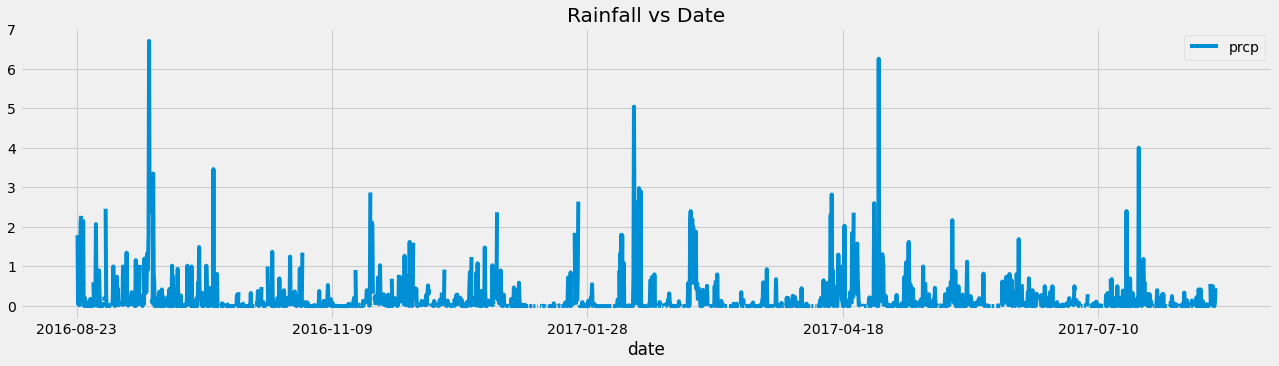

In [153]:
last_12_months_df.plot(figsize=(20, 5), title="Rainfall vs Date")

## Need to add a y axis label ***

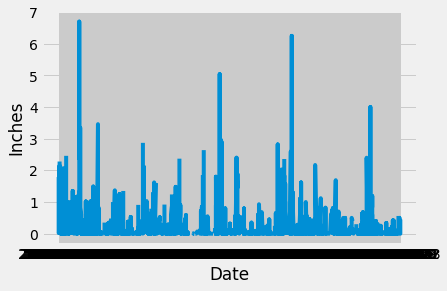

In [127]:
# plt.plot(last_12_months_df.index, last_12_months_df["prcp"])
# plt.xlabel("Date")
# plt.ylabel("Inches")
# plt.show()

In [35]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

    
# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data




In [147]:
# Use Pandas to calcualte the summary statistics for the precipitation data
last_12_months_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [148]:
columns = inspector.get_columns("station")
for col in columns:
    print(col["name"], col["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [152]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Station.station).order_by(Station.station).count()
station_count

9

In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()